In [1]:
import pandas as pd
import numpy as np

In [47]:
import datetime as dt

In [114]:
import matplotlib.pyplot as plt

In [125]:
train=pd.read_csv("train.csv")

In [126]:
train.head()

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,...,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled
0,07659f3758d8aee27f5a7e2887adeacb67021cb95ada1b...,05/04/18,05/04/18,06/04/18,3,1,2,0,46,3,...,7.0,3,3,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,C,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,7.706428
1,03930f033646d073462b35d411616323597715ac4fc398...,23/01/15,11/04/15,16/04/15,1,1,2,0,46,3,...,7.0,5,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,A,39fa9ec190eee7b6f4dff1100d6343e10918d044c75eac...,6.662563
2,d145a32920e6587ad95bfe299d80c0affa268220535aaf...,28/01/15,01/02/15,05/02/15,1,1,2,0,47,1,...,7.0,1,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,E,A,535fa30d7e25dd8a49f1536779734ec8286108d115da50...,7.871602
3,cfd77f44811ed62f25a220b53324cdbafc662a4c9e5f04...,02/05/15,11/06/15,16/06/15,1,1,2,2,46,2,...,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,5.344943
4,937cff9e4dcfc2459620153dfc8b9962ac22bea67dfb29...,02/09/15,14/12/15,19/12/15,1,1,2,0,46,2,...,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,7.059346


In [127]:
train.shape

(341424, 24)

In [128]:
len(np.unique(train["reservation_id"]))

341424

In [129]:
len(np.unique(train["memberid"]))

101327

In [130]:
train["amount_spent_per_room_night_scaled"].groupby(train["roomnights"]).mean()

roomnights
-45    7.779262
 0     6.961135
 1     7.983506
 2     7.669054
 3     7.574441
 4     7.735928
 5     7.711911
 6     7.855532
 7     7.772337
 8     7.896929
 9     8.017260
 10    7.885368
 11    8.360334
 12    7.955553
 13    8.133558
 14    7.836523
 15    8.055113
 16    7.850773
 17    8.119857
 18    7.845501
 19    7.902346
 20    7.711267
 21    7.928231
 22    8.227886
 23    7.282468
 24    8.450154
 25    8.448272
 26    7.262320
 27    7.365012
 28    7.844014
 29    8.229676
 30    7.418280
 31    7.656501
 32    7.569258
 33    9.863173
 34    9.923899
 35    7.424925
 36    7.937391
 37    7.098914
 39    8.299937
 41    6.039269
 42    7.052369
 47    9.373063
 60    9.290332
Name: amount_spent_per_room_night_scaled, dtype: float64

In [131]:
train.loc[:,["booking_date","checkin_date","checkout_date","roomnights"]]

,booking_date,checkin_date,checkout_date,roomnights
0,05/04/18,05/04/18,06/04/18,1
1,23/01/15,11/04/15,16/04/15,5
2,28/01/15,01/02/15,05/02/15,4
3,02/05/15,11/06/15,16/06/15,5
4,02/09/15,14/12/15,19/12/15,5
5,01/12/15,12/01/16,13/01/16,2
6,20/01/16,20/01/16,21/01/16,1
7,22/08/16,20/10/16,25/10/16,5
8,10/09/16,18/09/16,24/09/16,6
9,03/08/16,21/11/16,24/11/16,4


In [132]:
np.unique(train["roomnights"])

array([-45,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        39,  41,  42,  47,  60], dtype=int64)

In [133]:
train[train["roomnights"]==-45]

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,...,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled
36008,8cf7476b7111e0f969ef00d582f8a0833794239ebd3206...,30/12/14,22/03/15,29/03/15,1,2,4,3,45,1,...,8.0,6,4,D,1,a3af543aae775ab3cac3f789f74d5c0a70e6c0ecacb0db...,F,A,b17ef6d19c7a5b1ee83b907c595526dcb1eb06db8227d6...,7.779262


In [134]:
train["season_holidayed_code"].unique()

array([ 2.,  3.,  4.,  1., nan])

In [135]:
train.isnull().sum()

reservation_id                           0
booking_date                             0
checkin_date                             0
checkout_date                            0
channel_code                             0
main_product_code                        0
numberofadults                           0
numberofchildren                         0
persontravellingid                       0
resort_region_code                       0
resort_type_code                         0
room_type_booked_code                    0
roomnights                               0
season_holidayed_code                  114
state_code_residence                  4764
state_code_resort                        0
total_pax                                0
member_age_buckets                       0
booking_type_code                        0
memberid                                 0
cluster_code                             0
reservationstatusid_code                 0
resort_id                                0
amount_spen

In [136]:
train["room_type_booked_code"].unique()

array([3, 4, 2, 1, 5, 6], dtype=int64)

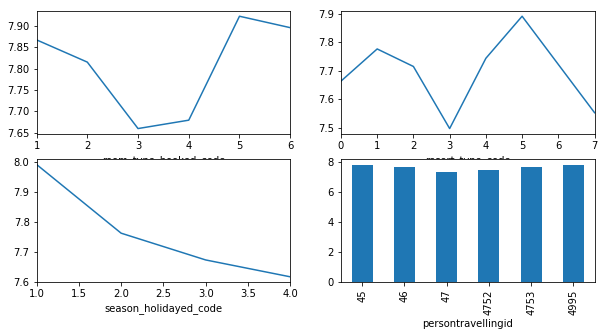

In [143]:
fig, axs = plt.subplots(2,2)
train["amount_spent_per_room_night_scaled"].groupby(train["room_type_booked_code"]).mean().plot(ax=axs[0,0],figsize=(10,5))
train["amount_spent_per_room_night_scaled"].groupby(train["resort_type_code"]).mean().plot(ax=axs[0,1],figsize=(10,5))
train["amount_spent_per_room_night_scaled"].groupby(train["season_holidayed_code"]).mean().plot(ax=axs[1,0],figsize=(10,5))
train["amount_spent_per_room_night_scaled"].groupby(train["persontravellingid"]).mean().plot(ax=axs[1,1],figsize=(10,5),kind="bar")
plt.show()

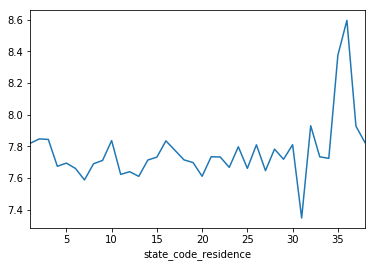

In [144]:
train["amount_spent_per_room_night_scaled"].groupby(train["state_code_residence"]).mean().plot()

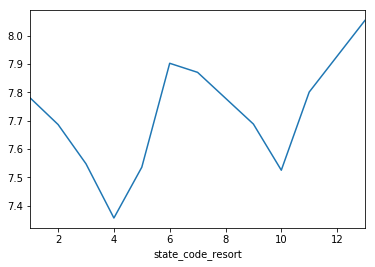

In [145]:
train["amount_spent_per_room_night_scaled"].groupby(train["state_code_resort"]).mean().plot()

In [146]:
train.loc[:,["numberofadults","numberofchildren","total_pax","amount_spent_per_room_night_scaled"]].head()

,numberofadults,numberofchildren,total_pax,amount_spent_per_room_night_scaled
0,2,0,3,7.706428
1,2,0,2,6.662563
2,2,0,2,7.871602
3,2,2,2,5.344943
4,2,0,2,7.059346


In [148]:
train["amount_spent_per_room_night_scaled"].groupby(train["reservationstatusid_code"]).mean()

reservationstatusid_code
A    7.720382
B    7.786523
C    7.661260
D    6.777217
Name: amount_spent_per_room_night_scaled, dtype: float64

In [39]:
train["member_age_buckets"].unique()

array(['F', 'H', 'D', 'E', 'I', 'G', 'C', 'B', 'A', 'J'], dtype=object)

In [41]:
train.head(2)

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,...,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled
0,07659f3758d8aee27f5a7e2887adeacb67021cb95ada1b...,05/04/18,05/04/18,06/04/18,3,1,2,0,46,3,...,7.0,3,3,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,C,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,7.706428
1,03930f033646d073462b35d411616323597715ac4fc398...,23/01/15,11/04/15,16/04/15,1,1,2,0,46,3,...,7.0,5,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,A,39fa9ec190eee7b6f4dff1100d6343e10918d044c75eac...,6.662563


In [149]:
train["checkin_date"]=pd.to_datetime(train["checkin_date"],format="%d/%m/%y")

In [150]:
train["checkout_date"]=pd.to_datetime(train["checkout_date"],format="%d/%m/%y")

In [151]:
train.head(1)

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,...,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled
0,07659f3758d8aee27f5a7e2887adeacb67021cb95ada1b...,05/04/18,2018-04-05,2018-04-06,3,1,2,0,46,3,...,7.0,3,3,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,C,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,7.706428


In [152]:
train["checkin_day"]=train["checkin_date"].dt.day

In [153]:
train["checkin_month"]=train["checkin_date"].dt.month
train["checkin_year"]=train["checkin_date"].dt.year

In [154]:
train["checkout_day"]=train["checkout_date"].dt.day
train["checkout_month"]=train["checkout_date"].dt.month
train["checkout_year"]=train["checkout_date"].dt.year

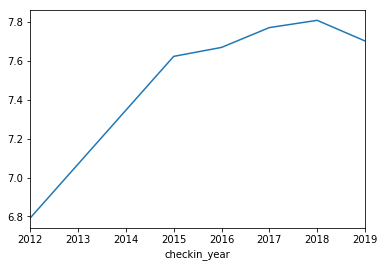

In [156]:
train["amount_spent_per_room_night_scaled"].groupby(train["checkin_year"]).mean().plot()

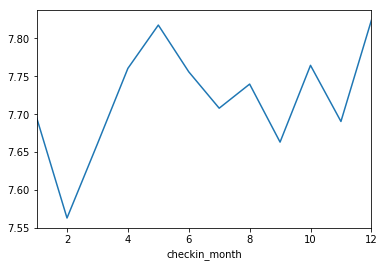

In [157]:
train["amount_spent_per_room_night_scaled"].groupby(train["checkin_month"]).mean().plot(kind="line")

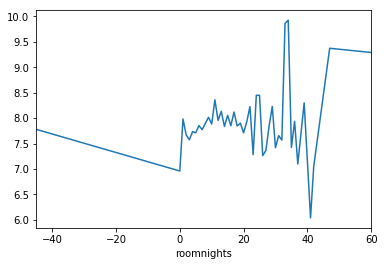

In [158]:
train["amount_spent_per_room_night_scaled"].groupby(train["roomnights"]).mean().plot(kind="line")

In [69]:
train["roomnights"].head(5)

0    1
1    5
2    4
3    5
4    5
Name: roomnights, dtype: int64

In [159]:
train["roomnights"]=(train["checkout_date"]-train["checkin_date"]).dt.days

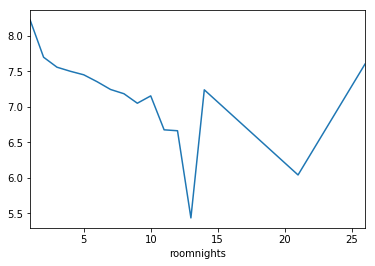

In [160]:
train["amount_spent_per_room_night_scaled"].groupby(train["roomnights"]).mean().plot(kind="line")

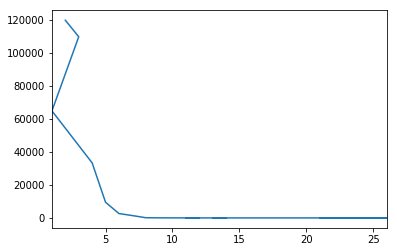

In [161]:
train["roomnights"].value_counts().plot()

In [162]:
train["numberofadults"].value_counts()

2     149414
4      84468
3      63247
6      20052
5       9849
8       5198
7       2673
9       1445
1       1280
10      1256
12      1010
11       357
16       293
14       216
15       207
13       120
24        83
20        64
18        62
0         27
17        20
22        19
19        12
25        12
21        11
23        10
32        10
30         9
Name: numberofadults, dtype: int64

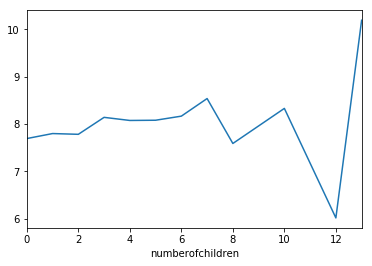

In [94]:
train["amount_spent_per_room_night_scaled"].groupby(train["numberofchildren"]).mean().plot()

In [123]:
train.total_pax[(train["numberofadults"]==0)&(train["numberofchildren"]==0)]

5352      3
12566     3
36366     4
52102     2
68167     4
78769     4
99340     3
109998    4
155198    4
161369    6
168590    3
190716    4
225103    4
230633    3
265593    3
286560    5
297480    2
298774    4
313490    3
316348    6
320085    3
320087    2
321367    2
322823    2
331118    3
339032    4
339324    5
Name: total_pax, dtype: int64

In [163]:
train["day_of_week_checkin"]=train["checkin_date"].dt.dayofweek

In [164]:
train["day_of_week_checkout"]=train["checkout_date"].dt.dayofweek

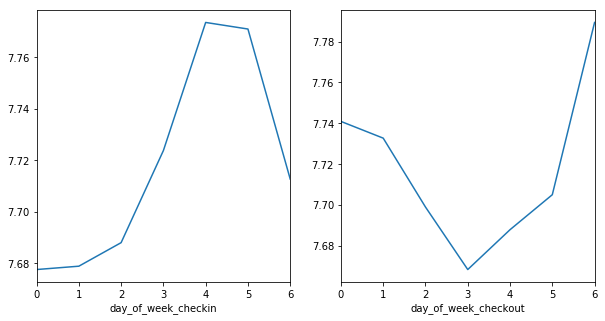

In [165]:
fig, axs = plt.subplots(1,2)
train["amount_spent_per_room_night_scaled"].groupby(train["day_of_week_checkin"]).mean().plot(ax=axs[0],figsize=(10,5))
train["amount_spent_per_room_night_scaled"].groupby(train["day_of_week_checkout"]).mean().plot(ax=axs[1],figsize=(10,5))
plt.show()

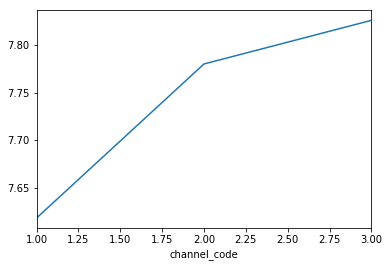

In [168]:
train["amount_spent_per_room_night_scaled"].groupby(train["channel_code"]).mean().plot()

In [169]:
train.columns

Index(['reservation_id', 'booking_date', 'checkin_date', 'checkout_date',
       'channel_code', 'main_product_code', 'numberofadults',
       'numberofchildren', 'persontravellingid', 'resort_region_code',
       'resort_type_code', 'room_type_booked_code', 'roomnights',
       'season_holidayed_code', 'state_code_residence', 'state_code_resort',
       'total_pax', 'member_age_buckets', 'booking_type_code', 'memberid',
       'cluster_code', 'reservationstatusid_code', 'resort_id',
       'amount_spent_per_room_night_scaled', 'checkin_day', 'checkin_month',
       'checkin_year', 'checkout_day', 'checkout_month', 'checkout_year',
       'day_of_week_checkin', 'day_of_week_checkout'],
      dtype='object')

In [255]:
train_new=train.loc[:,["channel_code","main_product_code","numberofadults","numberofchildren","persontravellingid","resort_region_code",
                      "resort_type_code","room_type_booked_code","roomnights","state_code_resort","booking_type_code"
                      "checkin_month","checkin_year",
                      "day_of_week_checkin", "day_of_week_checkout","amount_spent_per_room_night_scaled"]]

C:\Users\Nishant Kumar\Anaconda3\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [259]:
train_new_1=pd.get_dummies(train["reservationstatusid_code"])

In [244]:
train_new_2=pd.concat([train_new,train_new_1],axis=1)

(341424, 14)

In [245]:
train_new.head(3)

,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,state_code_resort,booking_type_code,checkin_month,checkin_year,day_of_week_checkin,day_of_week_checkout,amount_spent_per_room_night_scaled
0,2,0,46,3,3,3,1,3,1,4,2018,3,4,7.706428
1,2,0,46,3,3,4,5,5,1,4,2015,5,3,6.662563
2,2,0,47,1,5,4,4,1,1,2,2015,6,3,7.871602


In [246]:
train_new.isnull().sum()

numberofadults                        0
numberofchildren                      0
persontravellingid                    0
resort_region_code                    0
resort_type_code                      0
room_type_booked_code                 0
roomnights                            0
state_code_resort                     0
booking_type_code                     0
checkin_month                         0
checkin_year                          0
day_of_week_checkin                   0
day_of_week_checkout                  0
amount_spent_per_room_night_scaled    0
dtype: int64

In [247]:
train_new.dtypes

numberofadults                          int64
numberofchildren                        int64
persontravellingid                      int64
resort_region_code                      int64
resort_type_code                        int64
room_type_booked_code                   int64
roomnights                              int64
state_code_resort                       int64
booking_type_code                       int64
checkin_month                           int64
checkin_year                            int64
day_of_week_checkin                     int64
day_of_week_checkout                    int64
amount_spent_per_room_night_scaled    float64
dtype: object

In [248]:
train["cluster_code"].unique()

array(['F', 'E', 'D', 'B', 'A', 'C'], dtype=object)

In [253]:
x=train_new.drop(['amount_spent_per_room_night_scaled'],axis=1)
y=train_new["amount_spent_per_room_night_scaled"]
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(x,y, test_size =0.2)

In [214]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [254]:
import time
import winsound
from xgboost import XGBRegressor
import xgboost as xgb
regr = xgb.XGBRegressor(n_estimators=200)
regr.fit(x_train,y_train)
pred=regr.predict(x_cv)
print(np.sqrt(mean_squared_error(pred,y_cv)))


1.007562911668595


In [238]:
regr.fit(x,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [216]:
test=pd.read_csv("test.csv")

In [217]:
test.columns

Index(['reservation_id', 'booking_date', 'checkin_date', 'checkout_date',
       'channel_code', 'main_product_code', 'numberofadults',
       'numberofchildren', 'persontravellingid', 'resort_region_code',
       'resort_type_code', 'room_type_booked_code', 'roomnights',
       'season_holidayed_code', 'state_code_residence', 'state_code_resort',
       'total_pax', 'member_age_buckets', 'booking_type_code', 'memberid',
       'cluster_code', 'reservationstatusid_code', 'resort_id'],
      dtype='object')

In [219]:
test["checkin_date"]=pd.to_datetime(test["checkin_date"],format="%d/%m/%y")
test["checkout_date"]=pd.to_datetime(test["checkout_date"],format="%d/%m/%y")
test["roomnights"]=(test["checkout_date"]-test["checkin_date"]).dt.days
test["checkin_day"]=test["checkin_date"].dt.day
test["checkin_month"]=test["checkin_date"].dt.month
test["checkin_year"]=test["checkin_date"].dt.year
test["checkout_day"]=test["checkout_date"].dt.day
test["checkout_month"]=test["checkout_date"].dt.month
test["checkout_year"]=test["checkout_date"].dt.year
test["day_of_week_checkin"]=test["checkin_date"].dt.dayofweek
test["day_of_week_checkout"]=test["checkout_date"].dt.dayofweek
test_new=test.loc[:,["channel_code","main_product_code","numberofadults","numberofchildren","persontravellingid","resort_region_code",
                      "resort_type_code","room_type_booked_code","roomnights","state_code_resort",
                      "booking_type_code","checkin_month","checkin_year",
                      "day_of_week_checkin", "day_of_week_checkout"]]

In [221]:
test_new.columns

Index(['channel_code', 'main_product_code', 'numberofadults',
       'numberofchildren', 'persontravellingid', 'resort_region_code',
       'resort_type_code', 'room_type_booked_code', 'roomnights',
       'state_code_resort', 'booking_type_code', 'checkin_month',
       'checkin_year', 'day_of_week_checkin', 'day_of_week_checkout'],
      dtype='object')

In [223]:
test_new.shape

(146765, 15)

In [225]:
train_new.columns

Index(['channel_code', 'main_product_code', 'numberofadults',
       'numberofchildren', 'persontravellingid', 'resort_region_code',
       'resort_type_code', 'room_type_booked_code', 'roomnights',
       'state_code_resort', 'booking_type_code', 'checkin_month',
       'checkin_year', 'day_of_week_checkin', 'day_of_week_checkout',
       'amount_spent_per_room_night_scaled'],
      dtype='object')

In [239]:
pred=regr.predict(test_new)


In [240]:
solution=pd.read_csv("sample_submission.csv")

In [231]:
solution.head()

,reservation_id,amount_spent_per_room_night_scaled
0,7dae1ce6bc8f69481328f2be5c4943077dad5598b5f66d...,8
1,fe0d4e444e1818436c88f72f1cf800536c2f785e59baeb...,8
2,540bd4285ad8168e8388f84ee74a82cd4f97dc0a404d3e...,8
3,09593c907ae262e46f655b4db9e14f54a19eadcfdd2679...,8
4,f4c50caac68051faf37551d70bb17eebef2a20e2244cb1...,8


In [241]:
solution["amount_spent_per_room_night_scaled"]=pred

In [233]:
solution.head()

,reservation_id,amount_spent_per_room_night_scaled
0,7dae1ce6bc8f69481328f2be5c4943077dad5598b5f66d...,8.072033
1,fe0d4e444e1818436c88f72f1cf800536c2f785e59baeb...,7.544140
2,540bd4285ad8168e8388f84ee74a82cd4f97dc0a404d3e...,7.627195
3,09593c907ae262e46f655b4db9e14f54a19eadcfdd2679...,7.685449
4,f4c50caac68051faf37551d70bb17eebef2a20e2244cb1...,7.711368


In [242]:
solution.to_csv("sample_submission.csv",index=False)